In [1]:
import csv

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1356 (5.30 KB)
Trainable params: 1356 (5.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


163/175 [==========================>...] - ETA: 0s - loss: 2.8028 - accuracy: 0.1759
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
175/175 [==============================] - 3s 6ms/step - loss: 2.7698 - accuracy: 0.1852 - val_loss: 2.1511 - val_accuracy: 0.3743
Epoch 2/1000
 36/175 [=====>........................] - ETA: 0s - loss: 2.2536 - accuracy: 0.3322

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


171/175 [============================>.] - ETA: 0s - loss: 2.0266 - accuracy: 0.3995
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
175/175 [==============================] - 1s 4ms/step - loss: 2.0243 - accuracy: 0.4003 - val_loss: 1.5892 - val_accuracy: 0.6493
Epoch 3/1000
162/175 [==========================>...] - ETA: 0s - loss: 1.6871 - accuracy: 0.5004
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
175/175 [==============================] - 1s 5ms/step - loss: 1.6772 - accuracy: 0.5024 - val_loss: 1.2537 - val_accuracy: 0.7085
Epoch 4/1000
171/175 [============================>.] - ETA: 0s - loss: 1.4684 - accuracy: 0.5597
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
175/175 [==============================] - 1s 7ms/step - loss: 1.4669 - accuracy: 0.5603 - val_loss: 1.0375 - val_accuracy: 0.7271
Epoch 5/1000
169/175 [===========================>..] - ETA: 0s - loss: 1.3391 - accuracy: 0.5865


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

59/59 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8772


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 140ms/step
[5.04587909e-08 4.21059509e-13 9.85140681e-01 7.14880764e-04
 3.70387179e-13 1.21073863e-04 2.89165931e-15 8.95901542e-36
 9.98720191e-25 1.97887672e-19 0.00000000e+00 6.17786766e-10
 1.00971282e-12 1.51625969e-11 1.40231326e-02 2.97962378e-26
 2.32586856e-26 0.00000000e+00 8.60850426e-14 2.09431505e-07
 0.00000000e+00 0.00000000e+00 1.58322875e-24 1.16730009e-19
 7.24340997e-13 1.08666470e-37]
2


# Confusion matrix

233/233 [==============================] - 1s 4ms/step


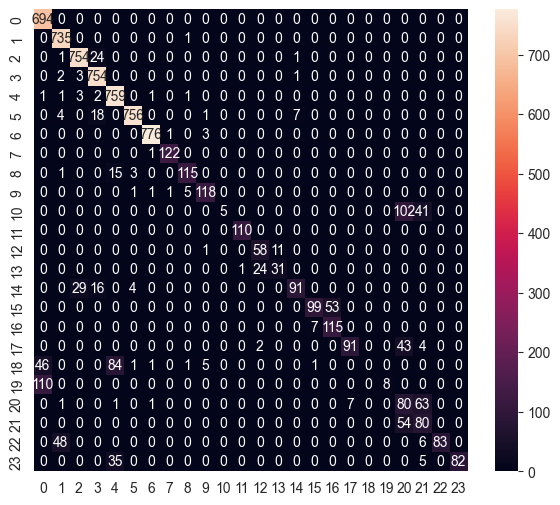

Classification Report
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       694
           1       0.93      1.00      0.96       736
           2       0.96      0.97      0.96       780
           3       0.93      0.99      0.96       760
           4       0.85      0.99      0.91       768
           5       0.99      0.96      0.97       786
           6       0.99      0.99      0.99       780
           7       0.98      0.99      0.99       123
           8       0.93      0.86      0.89       134
           9       0.92      0.94      0.93       126
          10       1.00      0.03      0.07       148
          11       0.99      1.00      1.00       110
          12       0.69      0.83      0.75        70
          13       0.74      0.55      0.63        56
          14       0.91      0.65      0.76       140
          15       0.93      0.65      0.76       152
          16       0.68      0.94      0.79       122
     

C:\gesture_recognition_by_image\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\gesture_recognition_by_image\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\gesture_recognition_by_image\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmp8w2yw5_6\assets


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmp8w2yw5_6\assets


7512

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.0458500e-08 4.2105710e-13 9.8514068e-01 7.1488210e-04 3.7038360e-13
 1.2107364e-04 2.8916371e-15 8.9588769e-36 9.9870491e-25 1.9788538e-19
 0.0000000e+00 6.1778316e-10 1.0097032e-12 1.5162479e-11 1.4023119e-02
 2.9795890e-26 2.3258504e-26 0.0000000e+00 8.6084379e-14 2.0943050e-07
 0.0000000e+00 0.0000000e+00 1.5832043e-24 1.1672910e-19 7.2433682e-13
 1.0866479e-37]
2
